In [1]:
import sys
import os

# Navigate up two levels from notebook to get to project root
notebook_dir = os.path.dirname(os.path.abspath("__file__"))
src_path = os.path.abspath(os.path.join(notebook_dir, "../../src"))

if src_path not in sys.path:
    sys.path.append(src_path)

# Now import your functions from eda.py inside src
from load import (
    load_data,
    summary_stats,
    plot_numeric_distributions,
    logarithmic_numerical_distribution,
    plot_categorical_distributions,
    check_missing_values,
    plot_correlations,
    detect_outliers,
    drop_rows_with_missing,
    cramers_v_matrix,
    plot_cramers_v_heatmap,
)


In [2]:

df = load_data(r"C:\Users\ABC\Desktop\10Acadamy\Week 5\Credit-Risk-Probability-Model\data\row\data.xlsx")



In [3]:
summary_stats(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95660 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95660 non-null  float64
 7   ProviderId            95660 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95659 non-null  float64
 13  TransactionStartTime  95661 non-null  object 
 14  PricingStrategy       95659 non-null  float64
 15  FraudResult        

In [4]:
df = df.drop(columns=["Unnamed: 16", "Unnamed: 17"])


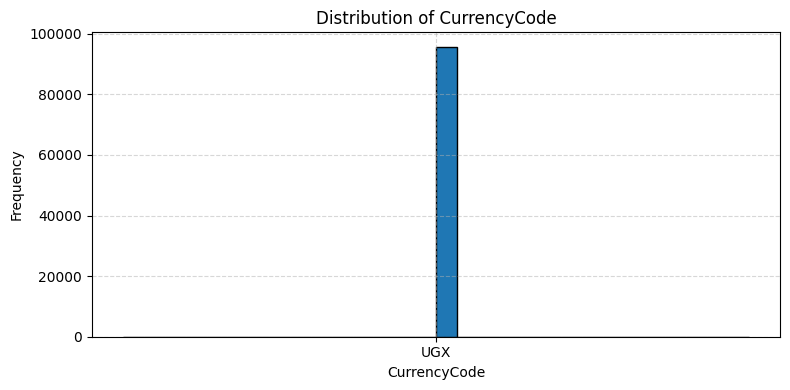

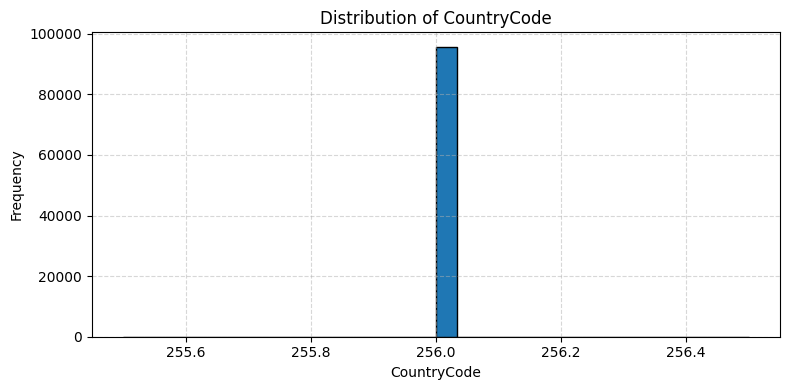

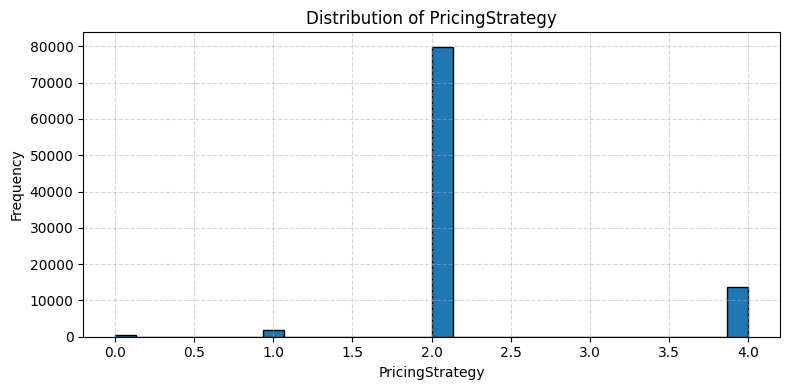

In [5]:
plot_numeric_distributions(df)

## Key Observations from numerical distribution:

- All transaction data appears to originate from a **single country**.
- The **`Amount`** and **`Value`** features exhibit a **wide range** and **highly skewed distributions**, indicating the presence of extreme values (**outliers**).
  - This was clearly visible in the **box plot for `Value`**.
- There are **4 distinct `PricingStrategy`** categories within the dataset.

---

## 🔍 Next Steps for Further Analysis on `Amount` and `Value`:

To better understand the distributions of `Amount` and `Value` and **mitigate the impact of their extreme ranges** on model performance:

- We will apply a **logarithmic transformation** (`log1p` or `log10`).
- This will **compress larger values**, making the distributions more manageable for:
  - Statistical analysis
  - Visualization
  - Machine learning model training


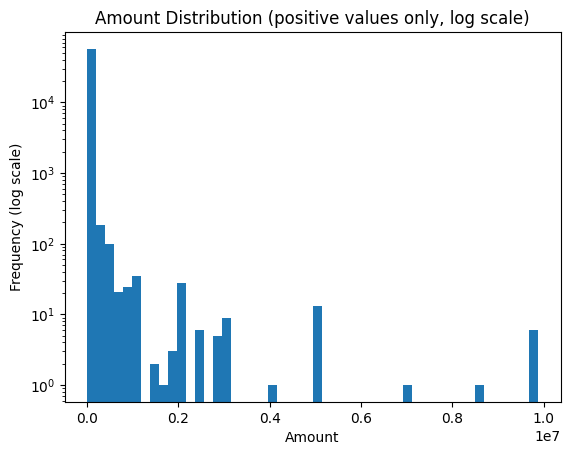

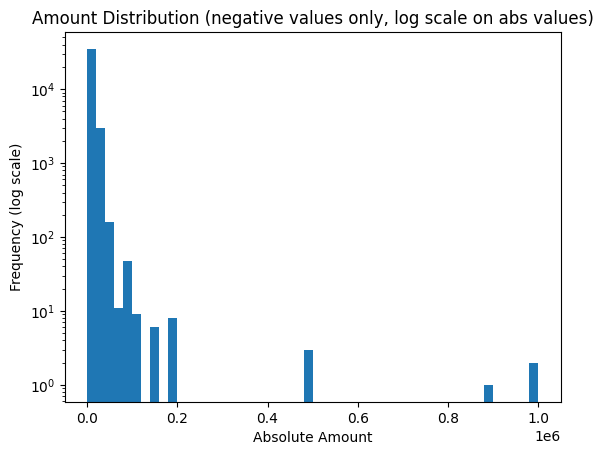

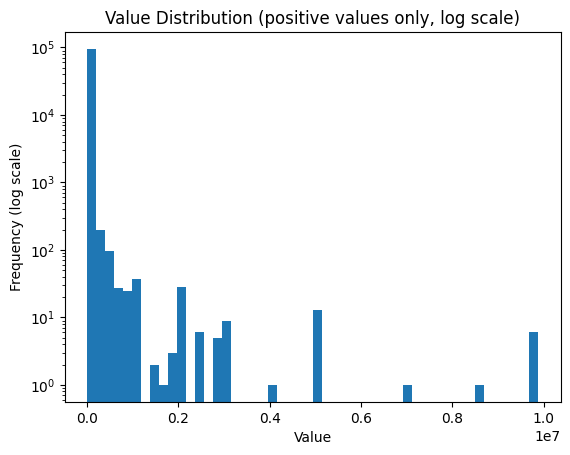

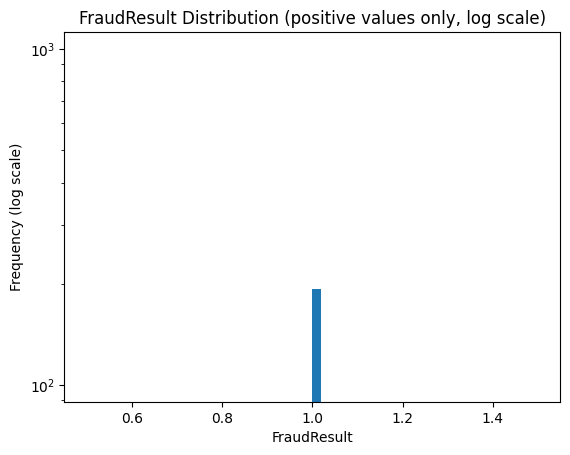

In [6]:
logarithmic_numerical_distribution(df)


## Amount and Value:
 The Amount and Value features exhibit an extremely wide range of values and highly skewed distributions. This was visually confirmed for 'Value' and 'Amount' in the box plot, which showed numerous outliers extending far to the right. This skewness suggests that most transactions are for relatively small amounts, with a few transactions being for exceptionally large sums.

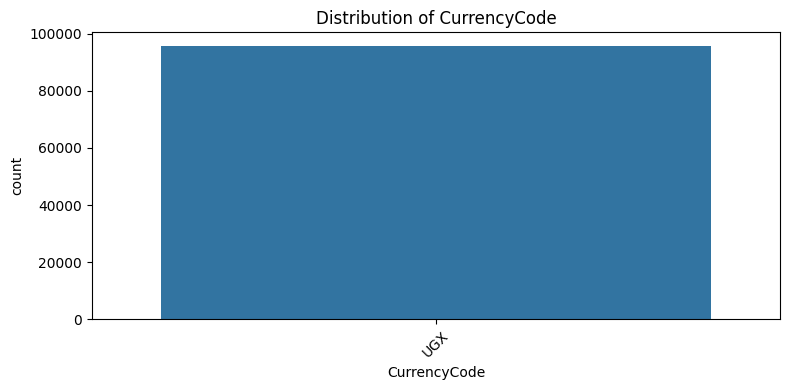

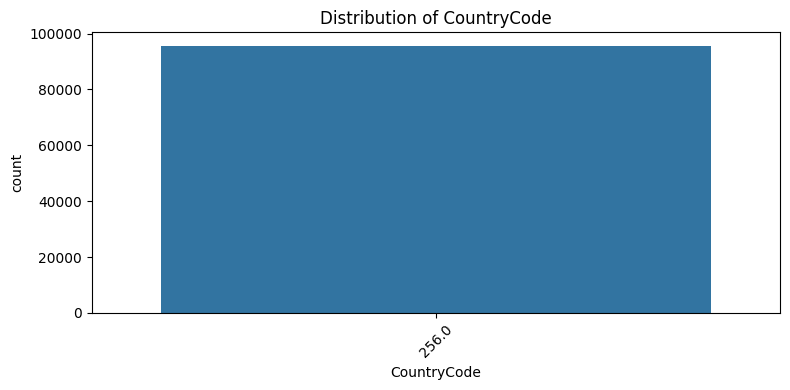

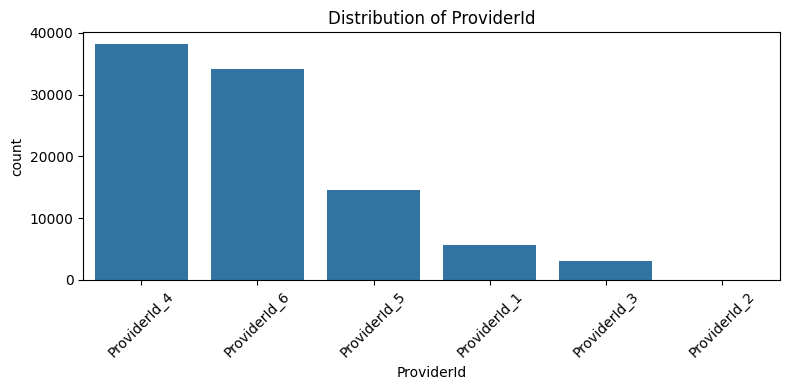

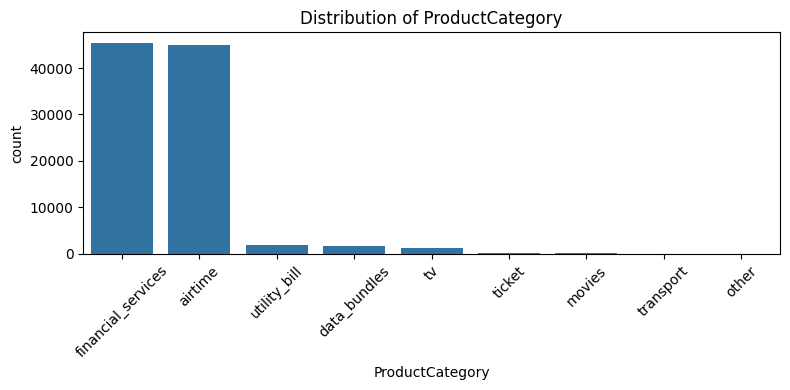

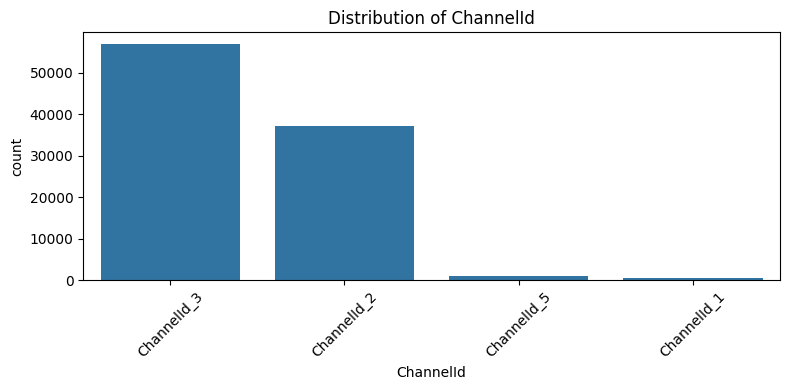

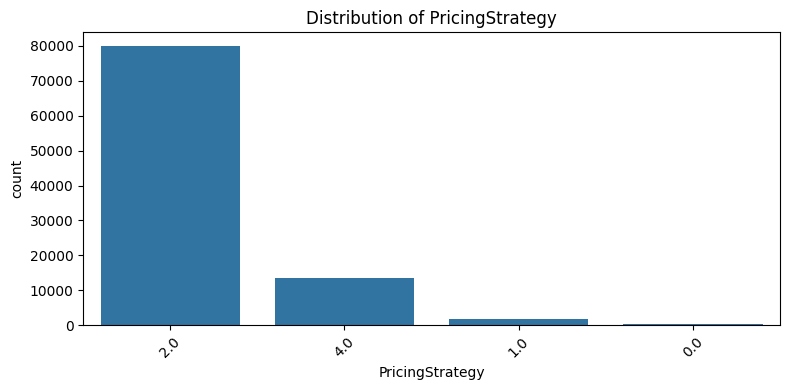

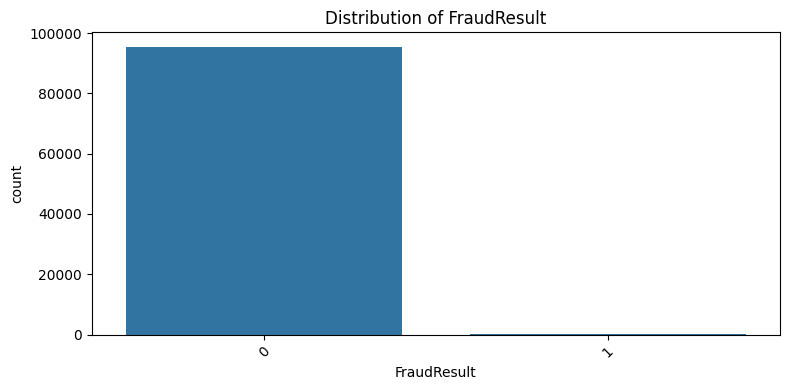

In [7]:
plot_categorical_distributions(df)

In [21]:
print(df['ProviderId'].unique())
print(df['ProductCategory'].unique())
print(df['ChannelId'].unique())
print(df['ProductId'].unique())
print(df['PricingStrategy'].unique())


['ProviderId_6' 'ProviderId_5' 'ProviderId_1' 'ProviderId_4'
 'ProviderId_3' 'ProviderId_2']
['airtime' 'financial_services' 'data_bundles' 'tv' 'utility_bill'
 'transport' 'ticket' 'movies' 'other']
['ChannelId_3' 'ChannelId_2' 'ChannelId_1' 'ChannelId_5']
['ProductId_10' 'ProductId_3' 'ProductId_15' 'ProductId_6' 'ProductId_11'
 'ProductId_19' 'ProductId_4' 'ProductId_21' 'ProductId_1' 'ProductId_5'
 'ProductId_20' 'ProductId_9' 'ProductId_24' 'ProductId_14' 'ProductId_2'
 'ProductId_13' 'ProductId_22' 'ProductId_8' 'ProductId_7' 'ProductId_27'
 'ProductId_12' 'ProductId_16' 'ProductId_23']
[2. 4. 1. 0.]


# Summary of Key Categorical Feature Distributions

## Provider Analysis
- The dataset includes transactions from a total of **6 distinct providers**. This suggests a moderate diversity in the sources of items purchased.

## Channel Distribution
- Customer transactions are processed through **4 distinct channels**:
    - **Channel 3** is identified as the leading channel, indicating its predominant usage for transactions.
    - **Channel 2** follows as the next most utilized channel.
    - **Channel 1** represents the smallest proportion of transactions, suggesting it has the least usage among the identified channels.

## Product Overview
- There are **9 unique products** recorded across all transactions.
- Among these, **two primary product types** exhibit dominance in terms of transaction volume or usage:
    - **Financial provider-related products.**
    - **Airtime products.**

---

# Relevant Dataset Field Descriptions for Context

- **`ProductCategory`**: This field organizes `ProductIds` into broader, more general product categories.
- **`ChannelId`**: This feature indicates the platform or method used by the customer for a transaction, specifically noting if the customer utilized a web interface, Android application, iOS application, 'pay later' option, or direct checkout.
- **`Value`**: This field represents the absolute monetary amount of a transaction.  
  It's important to note that while `Amount` (not explicitly detailed in your summary but mentioned in the source document) indicates debits from a customer account as positive values and credits into an account as negative values, `Value` specifically refers to the *absolute* value of that amount.
- **`ProviderId`**: This field uniquely identifies the source provider of the item or service that was purchased in a given transaction.




In [8]:
check_missing_values(df)

                      Missing Values   Percent
AccountId                          2  0.002091
CountryCode                        2  0.002091
ProviderId                         2  0.002091
Value                              3  0.003136
TransactionStartTime               1  0.001045
PricingStrategy                    3  0.003136


In [9]:
columns_with_missing = [
    'AccountId',
    'CountryCode',
    'ProviderId',
    'Value',
    'TransactionStartTime',
    'PricingStrategy'
]

df = drop_rows_with_missing(df, columns_with_missing)


In [10]:
check_missing_values(df)

Empty DataFrame
Columns: [Missing Values, Percent]
Index: []


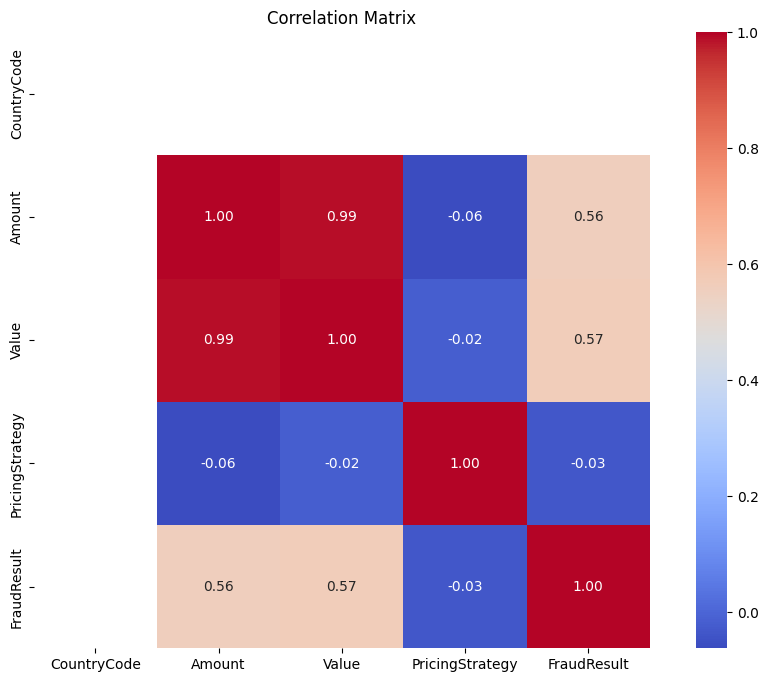

In [11]:
plot_correlations(df)

As expected, **Amount** and **Value** have a very strong relationship with a correlation coefficient of **0.99**.  
Meanwhile, **FraudResult** has a moderate correlation with **Amount**, showing a correlation coefficient of **0.57**.  
This indicates a moderate relationship between the fraud indicator and the transaction amount.


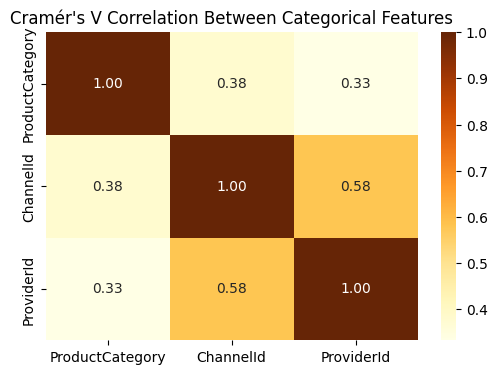

In [12]:
cat_features = ['ProductCategory', 'ChannelId', 'ProviderId']
plot_cramers_v_heatmap(df, categorical_features=cat_features)



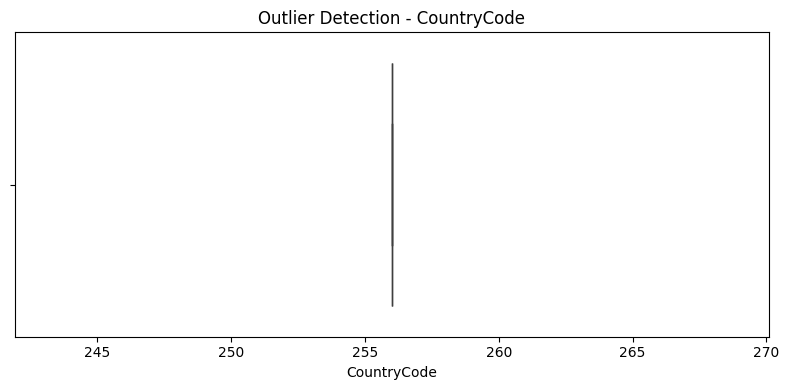

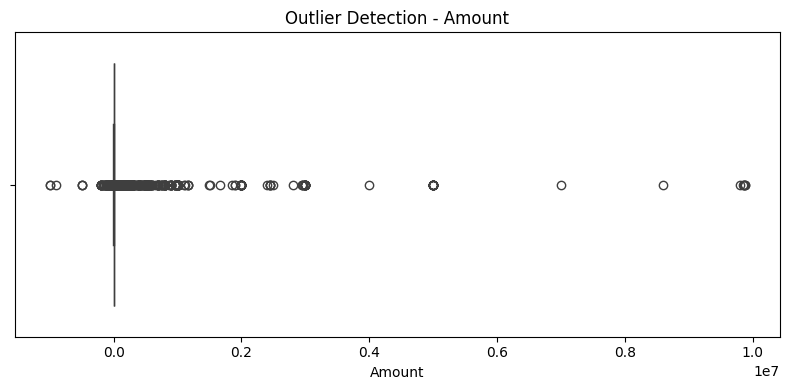

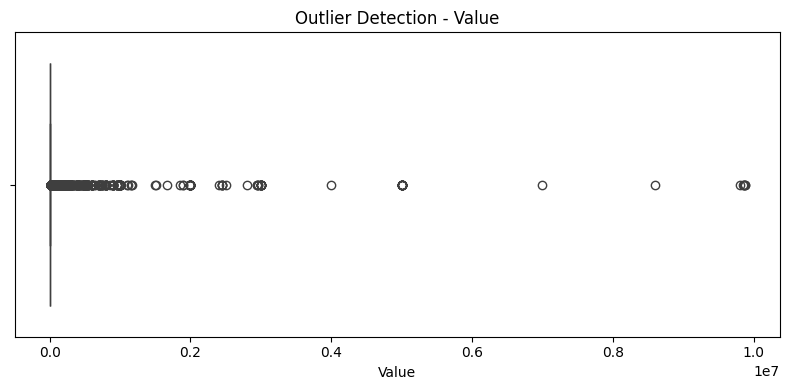

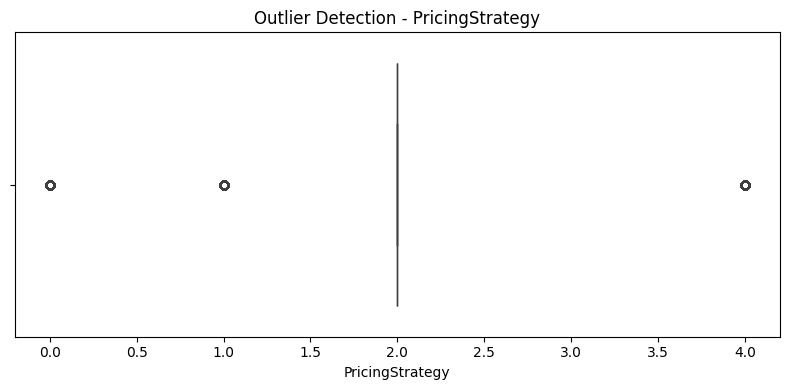

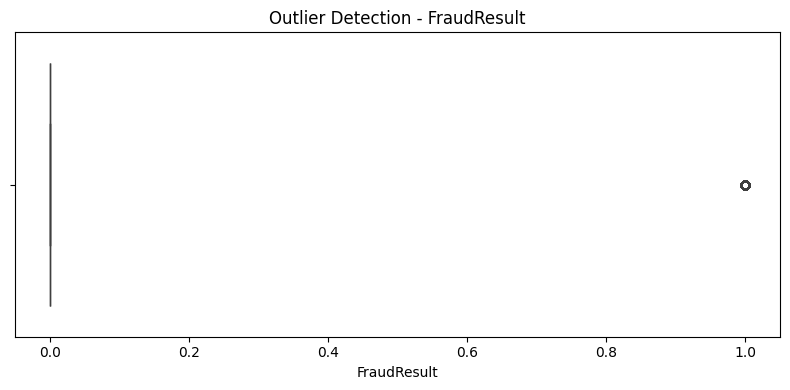

In [13]:
detect_outliers(df)

In [14]:
output_path = r"C:\Users\ABC\Desktop\10Acadamy\Week 5\Credit-Risk-Probability-Model\data\processed\nan_null.xlsx"
df.to_excel(output_path, index=False)
